In [1]:
%matplotlib notebook

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.ioff()

import seaborn as sns
sns.set()

from regressors.polynomial import PolynomialRegressor, XYPair

### Data Generation

In [3]:
n = 1000
x_dom = 3*np.pi

In [4]:
X = np.zeros((n, 2))
X.T[0] = np.linspace(-x_dom, x_dom, n)
X.T[1] = np.sin(np.linspace(-x_dom, x_dom, n))

E = np.random.random((n)) - 0.5

Y = ((X.T[0] + X.T[1] + E) * ((X.T[0] + X.T[1] + E) - x_dom) * ((X.T[0] + X.T[1] + E) + x_dom)).reshape(n, 1)
Y_upper_bound = ((X.T[0] + X.T[1] + 0.5) * ((X.T[0] + X.T[1] + 0.5) - x_dom) * ((X.T[0] + X.T[1] + 0.5) + x_dom)).reshape(n, 1)
Y_lower_bound = ((X.T[0] + X.T[1] - 0.5) * ((X.T[0] + X.T[1] - 0.5) - x_dom) * ((X.T[0] + X.T[1] - 0.5) + x_dom)).reshape(n, 1)

In [5]:
np.save('../data/X', X)
np.save('../data/Y', Y)

np.save('../data/E', E)
np.save('../data/Y_upper_bound', Y_upper_bound)
np.save('../data/Y_lower_bound', Y_lower_bound)

In [6]:
X.shape

(1000, 2)

In [7]:
Y.shape

(1000, 1)

<IPython.core.display.Javascript object>


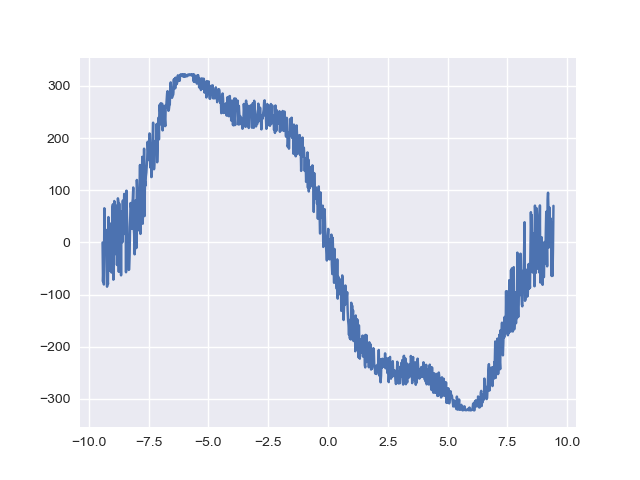

In [8]:
plt.plot(X.T[0], Y)
plt.show()

### Polynomial Regression

In [28]:
model = PolynomialRegressor(test_degrees=30, eps=0.01, early_stopping=True, patience=3)

In [21]:
model.fit(XYPair(np.linspace(-x_dom, x_dom, n).reshape(n, 1), Y), verbose=1)

degree: 0  ||  r_sqaured: 0.0
degree: 1  ||  r_sqaured: 0.4967563777334789
degree: 2  ||  r_sqaured: 0.4968333822808195
degree: 3  ||  r_sqaured: 0.9521042499656184
degree: 4  ||  r_sqaured: 0.9521044957659207
degree: 5  ||  r_sqaured: 0.9600330478134226
best_degree: 3  ||  best_r_squared: 0.9521042499656184

degree: 3  ||  r_sqaured: 0.9521042499656184


In [22]:
model.degree

3

In [23]:
model.coefs

array([[  1.55286946e+00,  -9.08742122e+01,  -7.27220705e-02,
          1.16883192e+00]])

In [24]:
model.labels

['1', 'x0', 'x0^2', 'x0^3']

In [25]:
model.func

[(1.5528694626206643, '1'),
 (-90.874212246860196, 'x0'),
 (-0.072722070513378867, 'x0^2'),
 (1.1688319176032977, 'x0^3')]

In [26]:
model.print_func()

1.552869*1 + -90.874212*x0 + -0.072722*x0^2 + 1.168832*x0^3


<IPython.core.display.Javascript object>


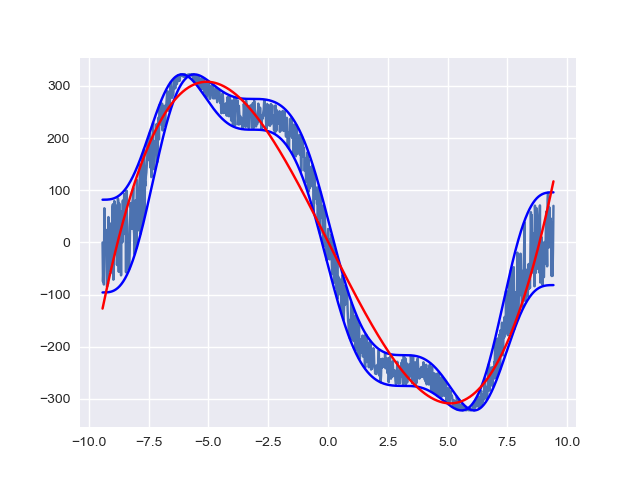

In [27]:
plt.plot(X.T[0], Y)
plt.plot(X.T[0], Y_upper_bound, c='b')
plt.plot(X.T[0], Y_lower_bound, c='b')
plt.plot(X.T[0], model.predict(), c='r')
plt.show()

<IPython.core.display.Javascript object>


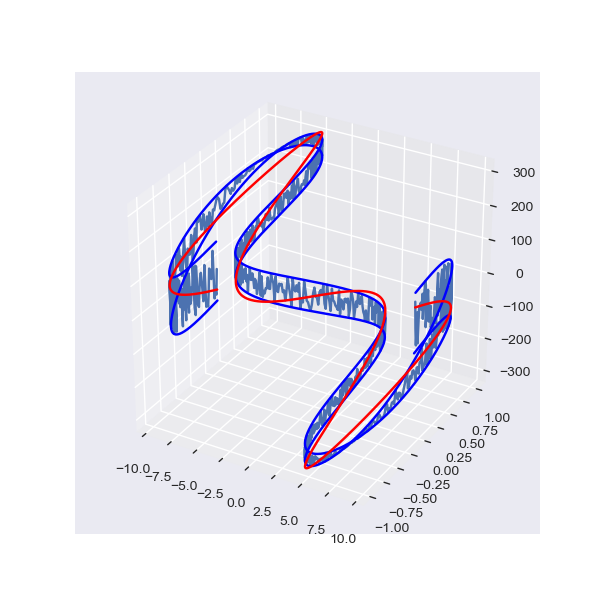

In [17]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X.T[0], X.T[1], Y.flatten())
ax.plot(X.T[0], X.T[1], Y_upper_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], Y_lower_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], model.predict().flatten(), c='r')
plt.show()